<a href="https://colab.research.google.com/github/lvrivas-byte/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: arma un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Física", "Química", "Biología", "Educación Física", "Inglés", "Ciudadanía", "Arte", "Música"]

# Apellidos y nombres comunes (puedes expandir esta lista)
apellidos = ["Gómez", "Rodríguez", "Pérez", "García", "López", "Martínez", "González", "Sánchez", "Fernández", "Torres"]
nombres = ["Juan", "Pedro", "María", "Ana", "Luis", "Carlos", "Sofía", "Valentina", "Camila", "Mateo"]

# Crear una lista de diccionarios para almacenar los datos de los alumnos
data = []
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)  # DNI ficticio de 8 dígitos

  for materia in materias:
    nota1 = random.randint(1, 10)  # Nota aleatoria
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20) # Faltas aleatorias
    data.append({
        "Apellido": apellido,
        "Nombre": nombre,
        "Nro_DNI": dni,
        "Materia": materia,
        "Nota 1er Trimestre": nota1,
        "Nota 2do Trimestre": nota2,
        "Nota 3er Trimestre": nota3,
        "Faltas a clases": faltas
    })


# Crear el DataFrame de Pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())

  Apellido  Nombre   Nro_DNI              Materia  Nota 1er Trimestre  \
0  Sánchez  Camila  84031201           Matemática                   8   
1  Sánchez  Camila  84031201  Lengua y Literatura                  10   
2  Sánchez  Camila  84031201             Historia                   8   
3  Sánchez  Camila  84031201            Geografía                   8   
4  Sánchez  Camila  84031201   Ciencias Naturales                   5   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   9                   4                1  
1                   5                  10                7  
2                   8                   6                1  
3                   9                   9               19  
4                   4                   6                3  


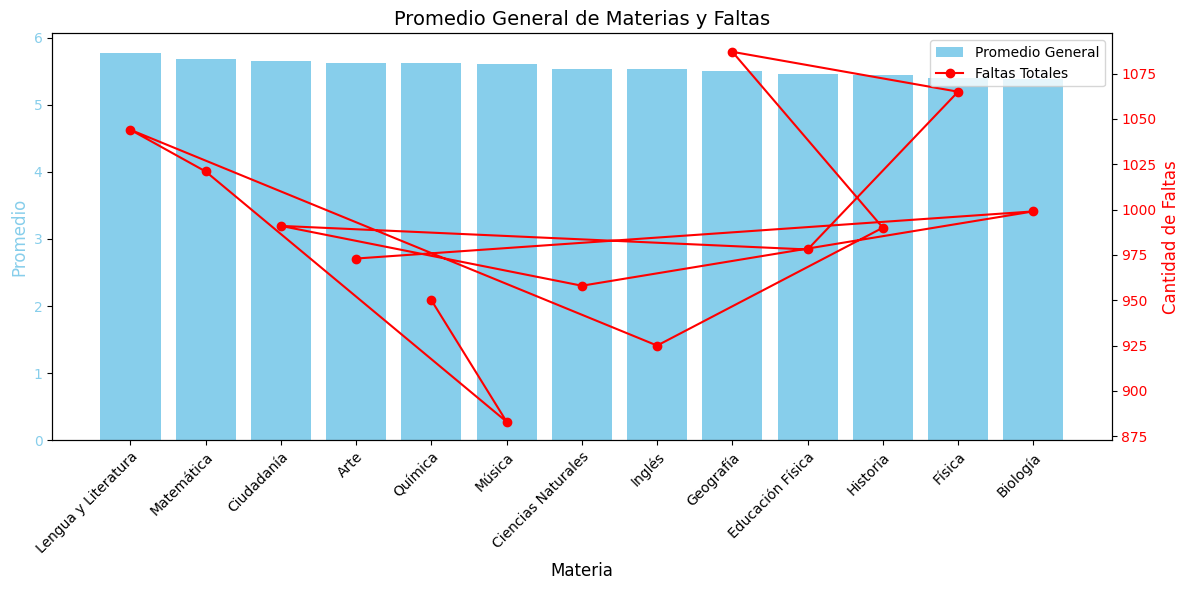

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedios_materias = df.groupby("Materia")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)
promedios_materias = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby("Materia")["Faltas a clases"].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra del promedio
ax1.bar(promedios_materias.index, promedios_materias.values, color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia", fontsize=12)
ax1.set_ylabel("Promedio", color="skyblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General de Materias y Faltas", fontsize=14)

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color="red", marker="o", label="Faltas Totales")
ax2.set_ylabel("Cantidad de Faltas", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# Rotar etiquetas del eje x para mejor lectura
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")


plt.tight_layout()
plt.show()

In [5]:
# prompt: df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)